<a href="https://colab.research.google.com/github/JuanRoVaz18/Eclipse/blob/main/act1_2p_si_eda_2_25_gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visa Continuous Value Prediction (2000–2025)**

**Author:** Juan Román González Vázquez  
**Project:** Analysis and Prediction of Visa’s Continuous Value  
**Study Period:** 2000 – 2025


#1) Dataset Analysis

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
df = pd.read_csv('dataset_ecuador_mensual_2000_2023.csv')

df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

df['date'] = pd.to_datetime(df['date'])


In [41]:
print(df.dtypes)
df.head()

date                         datetime64[ns]
year                                  int64
month                                 int64
country                              object
gdp_usa_trillion                    float64
unemployment_usa_pct                float64
visas_issued                        float64
visas_requested                     float64
visa_approval_ecuador_pct           float64
global_impact_event                  object
gdp_ecuador_billions                float64
unemployment_ecuador_pct            float64
ecuador_party                        object
usa_party                            object
dtype: object


,date,year,month,country,gdp_usa_trillion,unemployment_usa_pct,visas_issued,visas_requested,visa_approval_ecuador_pct,global_impact_event,gdp_ecuador_billions,unemployment_ecuador_pct,ecuador_party,usa_party
0,2000-01-01,2000,1,Ecuador,10.25,5.748357,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha
1,2000-02-01,2000,2,Ecuador,10.25,5.430868,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha
2,2000-03-01,2000,3,Ecuador,10.25,5.823844,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha
3,2000-04-01,2000,4,Ecuador,10.25,6.261515,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha
4,2000-05-01,2000,5,Ecuador,10.25,5.382923,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha


In [30]:
#Basic statistics of the Dataset
df.describe()

,Date,Year,Month,GDP_USA_Trillion,Unemployment_USA_pct,visas_Issued,visas_requested,Visa_Approval_Ecuador_pct,GDP_Ecuador_Billions,Unemployment_Ecuador_pct
count,288,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,2011-12-16 11:00:00,2011.500000,6.500000,16.810833,5.494452,8832.500000,13112.541667,67.626250,68.087500,7.241667
min,2000-01-01 00:00:00,2000.000000,1.000000,10.250000,3.879366,2458.000000,3583.000000,58.660000,18.300000,5.100000
25%,2005-12-24 06:00:00,2005.750000,3.750000,13.660000,5.145330,4912.250000,7196.000000,67.267500,35.575000,5.600000
50%,2011-12-16 12:00:00,2011.500000,6.500000,15.850000,5.525945,7462.500000,12000.000000,67.730000,67.350000,7.150000
75%,2017-12-08 18:00:00,2017.250000,9.250000,19.755000,5.807587,13192.750000,18229.500000,68.797500,100.300000,8.650000
max,2023-12-01 00:00:00,2023.000000,12.000000,27.720000,7.426366,21932.000000,34167.000000,73.330000,121.000000,10.100000
std,NaN,6.934236,3.458061,4.639755,0.498434,5355.486388,8115.162260,3.249995,34.156385,1.662939


In [31]:
df.nunique()

,0
Date,288
Year,24
Month,12
Country,1
GDP_USA_Trillion,23
Unemployment_USA_pct,288
visas_Issued,24
visas_requested,24
Visa_Approval_Ecuador_pct,24
Global_Impact_Event,4


In [32]:
df.dtypes


,0
Date,datetime64[ns]
Year,int64
Month,int64
Country,object
GDP_USA_Trillion,float64
Unemployment_USA_pct,float64
visas_Issued,float64
visas_requested,float64
Visa_Approval_Ecuador_pct,float64
Global_Impact_Event,object


In this case we dont need to clean the data, because we created the dataset manually.

In [33]:
print("Missing values per column:\n")
print(df.isnull().sum())

print("\nNumber of duplicated rows:", df.duplicated().sum())


Missing values per column:

Date                         0
Year                         0
Month                        0
Country                      0
GDP_USA_Trillion             0
Unemployment_USA_pct         0
visas_Issued                 0
visas_requested              0
Visa_Approval_Ecuador_pct    0
Global_Impact_Event          0
GDP_Ecuador_Billions         0
 Unemployment_Ecuador_pct    0
Ecuador_party                0
USA_party                    0
dtype: int64

Number of duplicated rows: 0


#Univariate analysis


*   Percentage of Approval by Year
*   Total Requested and Issued



In [44]:
df_yearly = df.groupby('year').agg({
    'visas_issued': 'sum',
    'visas_requested': 'sum'
}).reset_index()

df_yearly['approval_pct'] = (df_yearly['visas_issued'] / df_yearly['visas_requested']) * 100


Percentage of Approval by Year



/tmp/ipython-input-659225896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='approval_pct', data=df_yearly, palette='viridis')


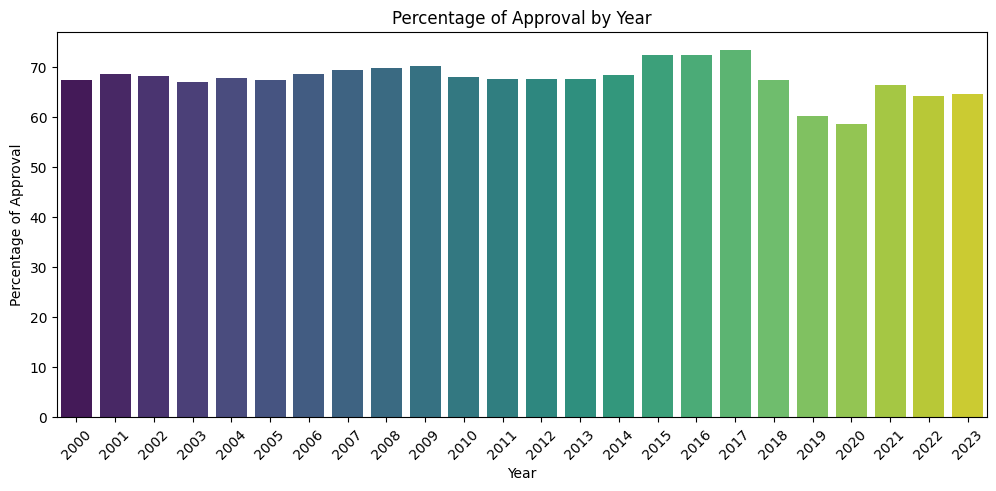

In [45]:
plt.figure(figsize=(12, 5))
sns.barplot(x='year', y='approval_pct', data=df_yearly, palette='viridis')
plt.title('Percentage of Approval by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Approval')
plt.xticks(rotation=45)
plt.show()

Total Visas Requested and Issued

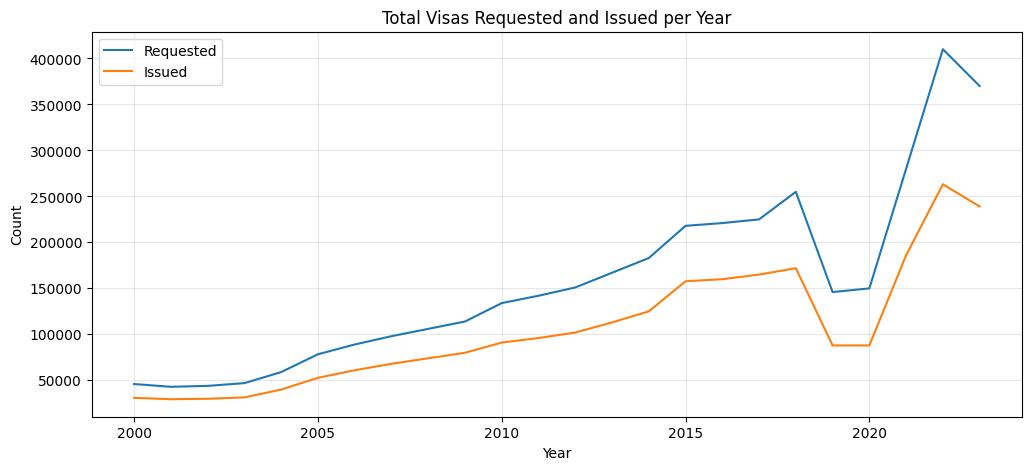

In [46]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='year', y='visas_requested', data=df_yearly, label='Requested')
sns.lineplot(x='year', y='visas_issued', data=df_yearly, label='Issued')
plt.title('Total Visas Requested and Issued per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


#Bivariate Analysis



*   Percentage of Visa Approval vs GDP of Ecuador
*   Percentage of Visa Approval by Unemployment Rate (Usa)
*   Percentage of Visa Approval by US political orientation
*   Percentage of Visa Approval by Ecuador political orientation
*   Percentage of Visa Approval by US Administration



Percentage of Visa Approval vs GDP of Ecuador

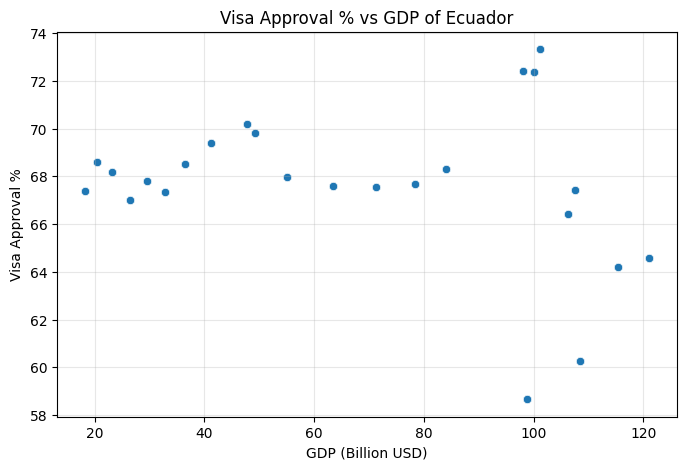

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='gdp_ecuador_billions', y='visa_approval_ecuador_pct', data=df)
plt.title('Visa Approval % vs GDP of Ecuador')
plt.xlabel('GDP (Billion USD)')
plt.ylabel('Visa Approval %')
plt.grid(alpha=0.3)
plt.show()


Percentage of Visa Approval by Unemployment Rate (Usa)

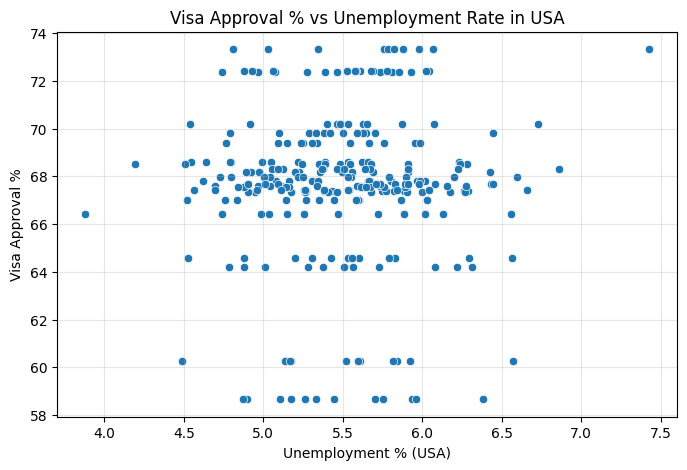

In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='unemployment_usa_pct', y='visa_approval_ecuador_pct', data=df)
plt.title('Visa Approval % vs Unemployment Rate in USA')
plt.xlabel('Unemployment % (USA)')
plt.ylabel('Visa Approval %')
plt.grid(alpha=0.3)
plt.show()


Visa Aprroval by Us Political Orientation

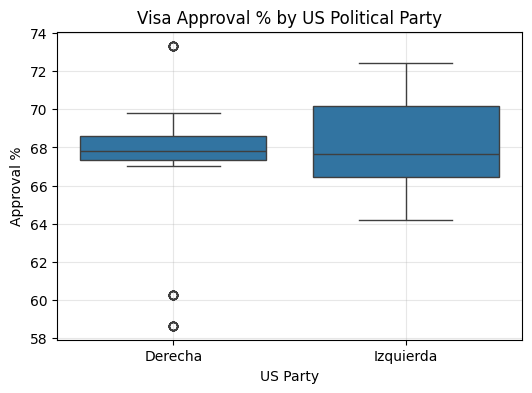

In [49]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='usa_party', y='visa_approval_ecuador_pct', data=df)
plt.title('Visa Approval % by US Political Party')
plt.xlabel('US Party')
plt.ylabel('Approval %')
plt.grid(alpha=0.3)
plt.show()


Percentage of Visa Approval by Ecuador Political Orientation

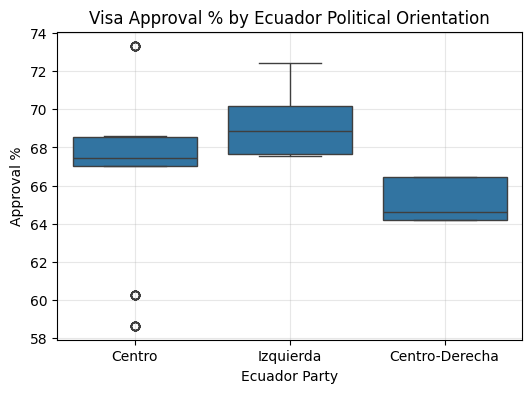

In [50]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='ecuador_party', y='visa_approval_ecuador_pct', data=df)
plt.title('Visa Approval % by Ecuador Political Orientation')
plt.xlabel('Ecuador Party')
plt.ylabel('Approval %')
plt.grid(alpha=0.3)
plt.show()


Percentage of Visa Approval by Us Administration

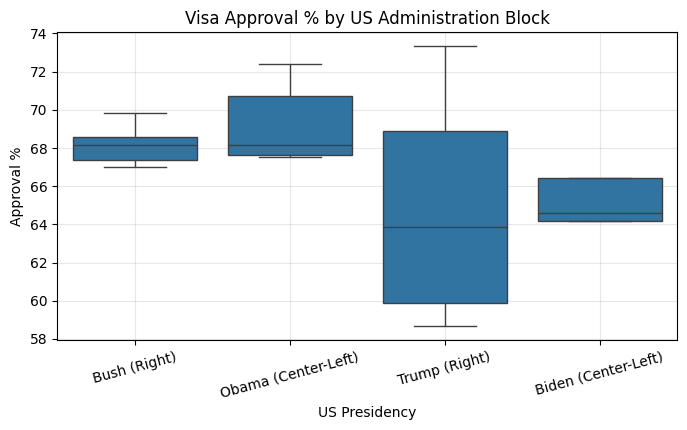

In [52]:
#Agrupping by president in power
def us_pressident(year):
    if year <= 2008:
        return 'Bush (Right)'
    elif year <= 2016:
        return 'Obama (Center-Left)'
    elif year <= 2020:
        return 'Trump (Right)'
    else:
        return 'Biden (Center-Left)'

df['us_presidency_block'] = df['year'].apply(us_pressident)

plt.figure(figsize=(8, 4))
sns.boxplot(x='us_presidency_block', y='visa_approval_ecuador_pct', data=df)
plt.title('Visa Approval % by US Administration Block')
plt.xlabel('US Presidency')
plt.ylabel('Approval %')
plt.grid(alpha=0.3)
plt.xticks(rotation=15)
plt.show()


#Multivariate Analysis



*   Correlation Heatmap
*   Approval and GDP over time



Correlation Heatmap

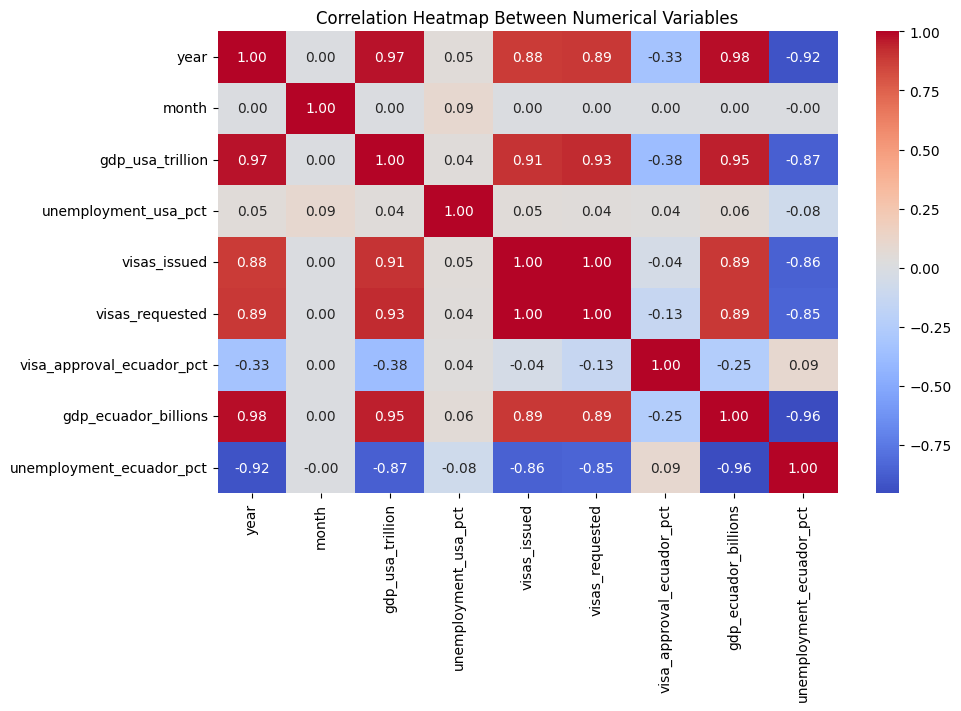

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Between Numerical Variables')
plt.show()


Approval, GDP and Time

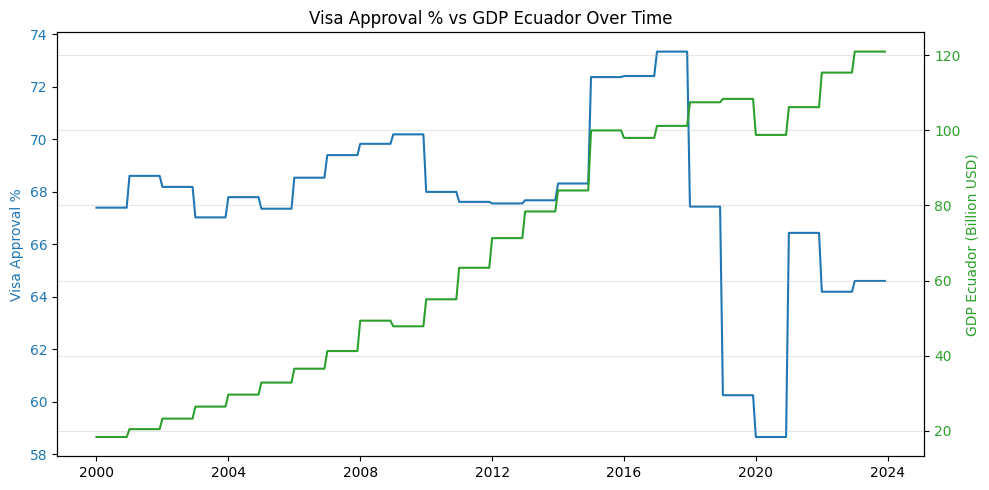

In [56]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(df['date'], df['visa_approval_ecuador_pct'], color='tab:blue', label='Visa Approval %')
ax1.set_ylabel('Visa Approval %', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['date'], df['gdp_ecuador_billions'], color='tab:green', label='GDP Ecuador')
ax2.set_ylabel('GDP Ecuador (Billion USD)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Visa Approval % vs GDP Ecuador Over Time')
fig.tight_layout()
plt.grid(alpha=0.3)
plt.show()
